# Первичный анализ и предобработка данных с Pandas

Пименова Елизавета, Шайдуров Дмитрий, РИ-461223

В этом задании рассмотрим первичный анализ данных на примере реальных данных по шоколадным батончикам. Данные содержат следующие атрибуты: 'company' - компания производитель, 'bar_name' - название шоколадного батончика, 'ref' - номер, 'rew_date' - дата оценки, 'percent' - процент какао бобов, 'company_loc' - местонахождение компании, 'rate' - рейтинг, 'bean_dtype' - тип какао бобов, 'bean_orig' - страна происхождения.

## Численные атрибуты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
best_bar= pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [3]:
type(best_bar)

pandas.core.frame.DataFrame

Оставим только местонахождение компании, рейтинг, процент какао бобов и страну происхождения для дальнейшего анализа.

In [4]:
best_bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]
best_bar.head() 

,company_loc,rate,percent,bean_orig
0,France,3.75,63%,Sao Tome
1,France,2.75,70%,Togo
2,France,3.00,70%,Togo
3,France,3.50,70%,Togo
4,France,3.50,70%,Peru


Необходимо построить гистограмму распределения рейтинга батончика через plot(). Количество столбцов гистограммы равно 20.
На одном графике необходимо построить график плотности вероятности, который строится на основе оценки непрерывного распределения вероятности. Гистограммы аппроксимируют комбинацией ядре, т.е. более простых распределений, например нормального (распределение Гаусса). Поэтому графики плотности еще называют ядерной оценки плотности (KDE-kernel density estimate). Строится kde с помощью функции плот с параметром kind='kde'.

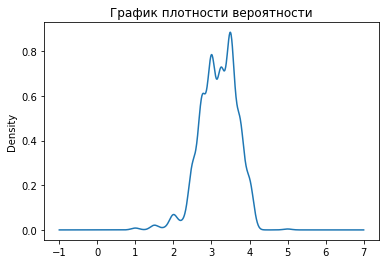

In [5]:
rates = best_bar['rate']
rates.plot(kind='kde', title='График плотности вероятности')

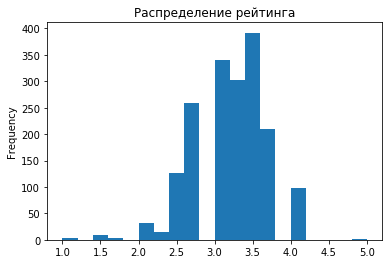

In [6]:
rates.plot.hist(bins = 20, title='Распределение рейтинга')

Необходимо построить гистограмму распределения для процента какао бобов. Однако, следует отметить, что данные атрибут имеет тип object. Гистограмму для такого типа построить не получится. 
Необходимо преобразовать данный тип в float с помощью функции apply. Внутри функции apply используйте lambda выражение, чтобы убрать знак '%' в конце каждого элемента, а затем преобразовать данные в тип с плавающей точкой.

In [7]:
percents=best_bar['percent'].apply(lambda x : x[:-1])
floatPercents=percents.astype(float)
best_bar.update(floatPercents)
best_bar

,company_loc,rate,percent,bean_orig
0,France,3.75,63,Sao Tome
1,France,2.75,70,Togo
2,France,3.00,70,Togo
3,France,3.50,70,Togo
4,France,3.50,70,Peru
5,France,2.75,70,Venezuela
6,France,3.50,70,Cuba
7,France,3.50,70,Venezuela
8,France,3.75,70,Venezuela
9,France,4.00,70,Peru


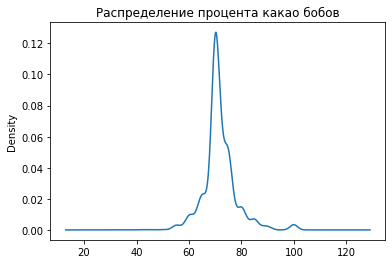

In [8]:
floatPercents.plot(kind='kde', title='Распределение процента какао бобов')

Постройте scatter plot зависимости рейтинга батончика от процента какао бобов, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.
Необходимо это для того, чтобы оценить зависимость рейтинга от содержания кокао в батончиках. 

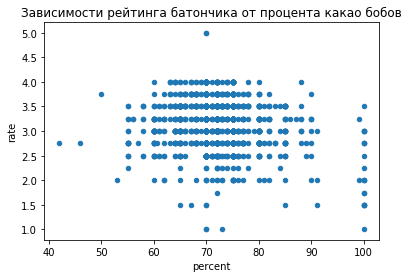

In [9]:
chokoRate = pd.concat([floatPercents, rates], axis=1)
chokoRate.plot(kind='scatter', x='percent', y='rate', title='Зависимости рейтинга батончика от процента какао бобов')

Постройте "ящик с усами" для числовых распределений с помощью функции boxplot. Возпользуйтесь также функцией describe() для каждого распределения.

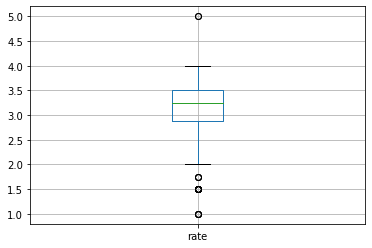

In [10]:
chokoRate.boxplot(column='rate')

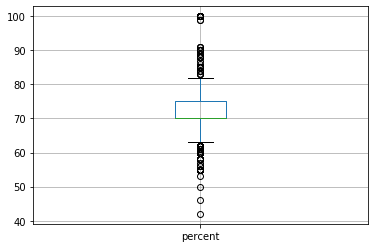

In [11]:
chokoRate.boxplot(column='percent')

In [12]:
chokoRate.describe()

,percent,rate
count,1795.000000,1795.000000
mean,71.698329,3.185933
std,6.323118,0.478062
min,42.000000,1.000000
25%,70.000000,2.875000
50%,70.000000,3.250000
75%,75.000000,3.500000
max,100.000000,5.000000


## Категориальные атрибуты

Обратим внимание на категориальные признаки. Построить гистограмму распределения не удастся, но в качестве начального анализа можно воспользоваться функцией value_counts, которая позволяет вывести количество встречающихся значений в атрибуте данных. Обратите внимание внимание на места происхождения бобов, которые редко встречаются в наборе данных. Для вывода начальных и конечных элементов используются функции head() и tail() соответственно.

In [13]:
beanOrigins = best_bar['bean_orig']
origins = beanOrigins.value_counts()
originsCount = len(origins)
print('bean origins counts:', originsCount)
print()
origins

bean origins counts: 100



Venezuela                        214
Ecuador                          193
Peru                             165
Madagascar                       145
Dominican Republic               141
                                  73
Nicaragua                         60
Brazil                            58
Bolivia                           57
Belize                            49
Papua New Guinea                  42
Colombia                          40
Costa Rica                        38
Vietnam                           38
Tanzania                          34
Trinidad                          33
Ghana                             33
Mexico                            30
Guatemala                         28
Hawaii                            28
Domincan Republic                 25
Jamaica                           20
Grenada                           19
Indonesia                         16
Honduras                          15
Cuba                              11
Congo                             10
S

После того, как выведено количество уникальных значений можно представить их визуальное распределение с помощью функции plot(kind='bar').

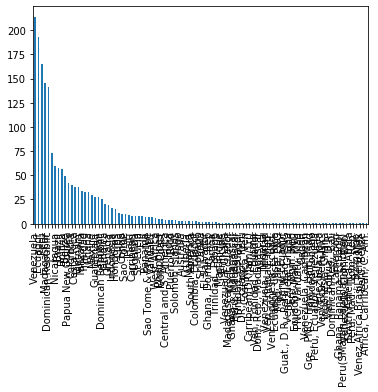

In [14]:
origins.plot(kind='bar')

По гистограмме распределения категориальных атрибутов о происхождения какао бобов можно увидеть, что присутствует хаос в данных. Для некоторых объектов названия мест происхождения написаны с ошибками, у некоторых объектов вообще отсутствует место происхождения, а так же есть батончики, состоящие из какао бобов из разных мест происхождения. В этой связи необходимо произвести предобработку данных для дальнейшего анализа.
Для начала убрать объекты с пропущенными записями, используя функцию dropna. Необходимо отметить, что в качестве параметров функции передается 'axis': где 0 - удалять по строкам (объектам), 1 - удалять по столбцам (признакам); 'how': где 'any' - удалять строку или столбец, если есть пустой объект, 'all' - удалять строку или столбец, если все объекты пустые.  

In [15]:
best_bar.bean_orig.dropna(axis=0, how =  all)

0                 Sao Tome
1                     Togo
2                     Togo
3                     Togo
4                     Peru
5                Venezuela
6                     Cuba
7                Venezuela
8                Venezuela
9                     Peru
10                  Panama
11              Madagascar
12                  Brazil
13                 Ecuador
14                Colombia
15                   Burma
16        Papua New Guinea
17               Venezuela
18                    Peru
19                    Peru
20                    Peru
21                 Bolivia
22                    Peru
23                    Peru
24                    Peru
25                    Fiji
26                    Fiji
27                    Fiji
28                    Fiji
29                 Ecuador
               ...        
1765                Belize
1766                      
1767            Madagascar
1768               Ecuador
1769              Trinidad
1770              Tanzania
1

Заметим, что пустые записи из атрибута происхождения бобов не удалилсь. Значит "пустые" записи не являются пустыми. Выведите все уникальные значения атрибута 'bean_orig' с помощью функции unique() и найдите значение пустой записи.

In [16]:
best_bar.bean_orig.unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

Для того, чтобы исключить данный элемент, необходимо использовать слудующую конструкцию: best_bar['bean_orig'] != 'element value', которая вернет бинарный массив элементов, где True - атрибут объекта не принимает значение 'element value', False - атрибут объекта принимает значение 'element value'. Затем полученную бинарную матрицу передаем в качестве маски, по которой будут выбраны объекты из нашего массива данных.

In [17]:
dropElement = best_bar['bean_orig'] != '\xa0'

uniqueOrigins = best_bar.bean_orig[dropElement]
best_bar[dropElement]['bean_orig'].value_counts() 

Venezuela                        214
Ecuador                          193
Peru                             165
Madagascar                       145
Dominican Republic               141
Nicaragua                         60
Brazil                            58
Bolivia                           57
Belize                            49
Papua New Guinea                  42
Colombia                          40
Costa Rica                        38
Vietnam                           38
Tanzania                          34
Trinidad                          33
Ghana                             33
Mexico                            30
Guatemala                         28
Hawaii                            28
Domincan Republic                 25
Jamaica                           20
Grenada                           19
Indonesia                         16
Honduras                          15
Cuba                              11
Congo                             10
Sao Tome                          10
H

Помимо этого необходимо решить проблему с батончиками из разных какао бобов. Лучшим способом является обработка и разделение этих составных бобов. Но на данном этапе, в виду их малого вклада, мы уберем их и сделаем одним видом сложного состава 'complex'. Будем считать редковстречающимися, если в выборке их не более 5.

In [18]:
best_bar[dropElement].bean_orig = best_bar[dropElement].bean_orig.mask((best_bar[dropElement].bean_orig.map(best_bar[dropElement].bean_orig.value_counts())) <= 5, "complex")
best_bar[dropElement]

D:\anaconda2\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,company_loc,rate,percent,bean_orig
0,France,3.75,63,Sao Tome
1,France,2.75,70,Togo
2,France,3.00,70,Togo
3,France,3.50,70,Togo
4,France,3.50,70,Peru
5,France,2.75,70,Venezuela
6,France,3.50,70,Cuba
7,France,3.50,70,Venezuela
8,France,3.75,70,Venezuela
9,France,4.00,70,Peru


Постройте круговую гистограмму распределения для стран происзводителей какао бобов с помощью функции pie().

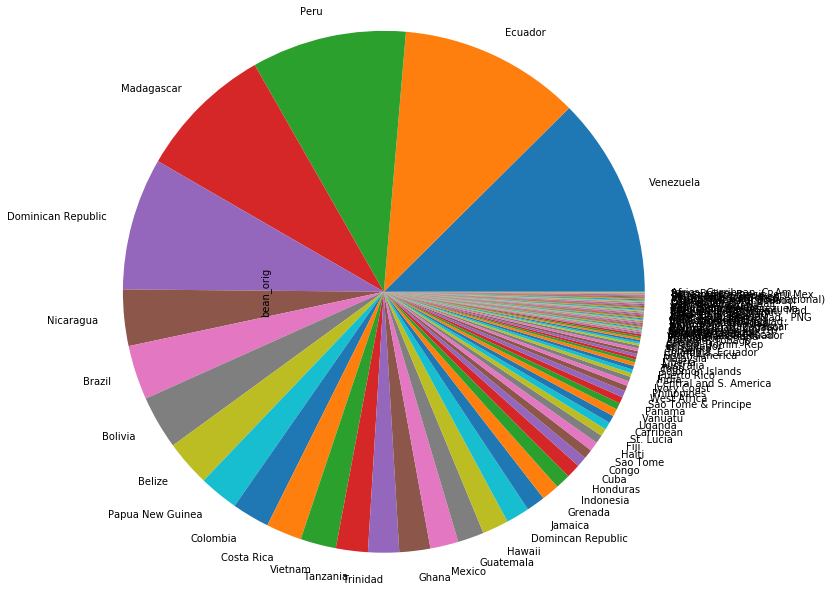

In [19]:
best_bar[dropElement]['bean_orig'].value_counts().plot.pie(radius=3)

## Попарные графики распределений

In [20]:
from sklearn import preprocessing
from seaborn import pairplot
from seaborn import set

Построить попарные распределения для всех признаков.

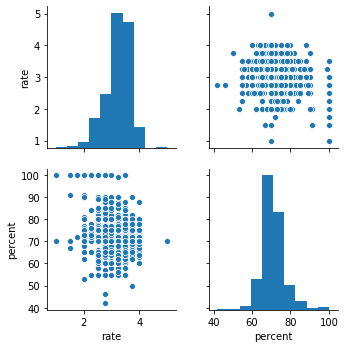

In [21]:
#pairplot(best_bar[dropElement], vars=['bean_orig', 'rate', 'percent', 'company_loc'], height = 5)

characteristics = ['bean_orig', 'rate', 'company_loc', 'percent']
sns_plot = pairplot(best_bar[dropElement][characteristics])

Определите, где растут лучшие какао бобы, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения. Напишите первую тройку лучших в обоих случаях.

In [22]:
averageRating = best_bar[dropElement].groupby(['bean_orig']).mean()
print(averageRating)
averageRating.sort_values(by='rate', ascending=False).head(3)

                                  rate
bean_orig                             
Africa, Carribean, C. Am.     2.750000
Australia                     3.250000
Belize                        3.234694
Bolivia                       3.197368
Brazil                        3.284483
Burma                         3.000000
Cameroon                      3.250000
Carribean                     2.968750
Carribean(DR/Jam/Tri)         3.000000
Central and S. America        3.250000
Colombia                      3.225000
Colombia, Ecuador             2.916667
Congo                         3.325000
Cost Rica, Ven                2.750000
Costa Rica                    3.144737
Cuba                          3.250000
DR, Ecuador, Peru             3.750000
Dom. Rep., Madagascar         4.000000
Domincan Republic             3.190000
Dominican Rep., Bali          3.750000
Dominican Republic            3.209220
Ecuador                       3.134715
Ecuador, Costa Rica           3.250000
Ecuador, Mad., PNG       

,rate
bean_orig,
"Dom. Rep., Madagascar",4.0
"Ven, Bolivia, D.R.",4.0
"Gre., PNG, Haw., Haiti, Mad",4.0


In [23]:
madianRatings = best_bar[dropElement].groupby(['bean_orig']).median()
madianRatings.sort_values(by='rate', ascending=False).head(3)

,rate
bean_orig,
"Peru, Dom. Rep",4.0
"Dom. Rep., Madagascar",4.0
"Ven, Bolivia, D.R.",4.0
